<a href="https://colab.research.google.com/github/ngoc43456/DuDoanKhaNangMacBenhTimMach/blob/main/D%E1%BB%B1_%C4%91o%C3%A1n_kh%E1%BA%A3_n%C4%83ng_m%E1%BA%AFc_b%E1%BB%87nh_tim_m%E1%BA%A1ch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo graphviz --quiet

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from graphviz import Digraph
from IPython.display import Image
import joblib
from scipy import stats
from scipy.stats import shapiro, skew
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# URL của dataset Cleveland (phổ biến nhất)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Tên các cột theo mô tả của UCI
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Đọc dữ liệu
df = pd.read_csv(url, names=column_names, na_values='?')

# Xem thông tin
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
# Chọn các biến phân loại để kiểm tra
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Đếm số lượng và tính % cho từng biến
for var in categorical_vars:
    print(f"\n▶ Biến: {var}")
    counts = df[var].value_counts(dropna=False).sort_index()
    percents = df[var].value_counts(normalize=True, dropna=False).sort_index() * 100
    summary = pd.DataFrame({'Giá trị': counts.index, 'Số lượng': counts.values, 'Tỷ lệ (%)': percents.values})
    print(summary.to_string(index=False))


▶ Biến: sex
 Giá trị  Số lượng  Tỷ lệ (%)
     0.0        97  32.013201
     1.0       206  67.986799

▶ Biến: cp
 Giá trị  Số lượng  Tỷ lệ (%)
     1.0        23   7.590759
     2.0        50  16.501650
     3.0        86  28.382838
     4.0       144  47.524752

▶ Biến: fbs
 Giá trị  Số lượng  Tỷ lệ (%)
     0.0       258  85.148515
     1.0        45  14.851485

▶ Biến: restecg
 Giá trị  Số lượng  Tỷ lệ (%)
     0.0       151  49.834983
     1.0         4   1.320132
     2.0       148  48.844884

▶ Biến: exang
 Giá trị  Số lượng  Tỷ lệ (%)
     0.0       204  67.326733
     1.0        99  32.673267

▶ Biến: slope
 Giá trị  Số lượng  Tỷ lệ (%)
     1.0       142  46.864686
     2.0       140  46.204620
     3.0        21   6.930693

▶ Biến: ca
 Giá trị  Số lượng  Tỷ lệ (%)
     0.0       176  58.085809
     1.0        65  21.452145
     2.0        38  12.541254
     3.0        20   6.600660
     NaN         4   1.320132

▶ Biến: thal
 Giá trị  Số lượng  Tỷ lệ (%)
     3.0       166 

In [ ]:
# In tỉ lệ missing value cho từng cột
missing_percent = (df.isnull().sum() / len(df)) * 100
print("Tỉ lệ missing value (%):")
print(missing_percent[missing_percent > 0].round(2))

Tỉ lệ missing value (%):
ca      1.32
thal    0.66
dtype: float64


In [ ]:
df_filled = df.copy()
# Dùng mode (giá trị xuất hiện nhiều nhất) cho categorical
df_filled.fillna({
    'ca': df_filled['ca'].mode()[0],
    'thal': df_filled['thal'].mode()[0]
}, inplace=True)

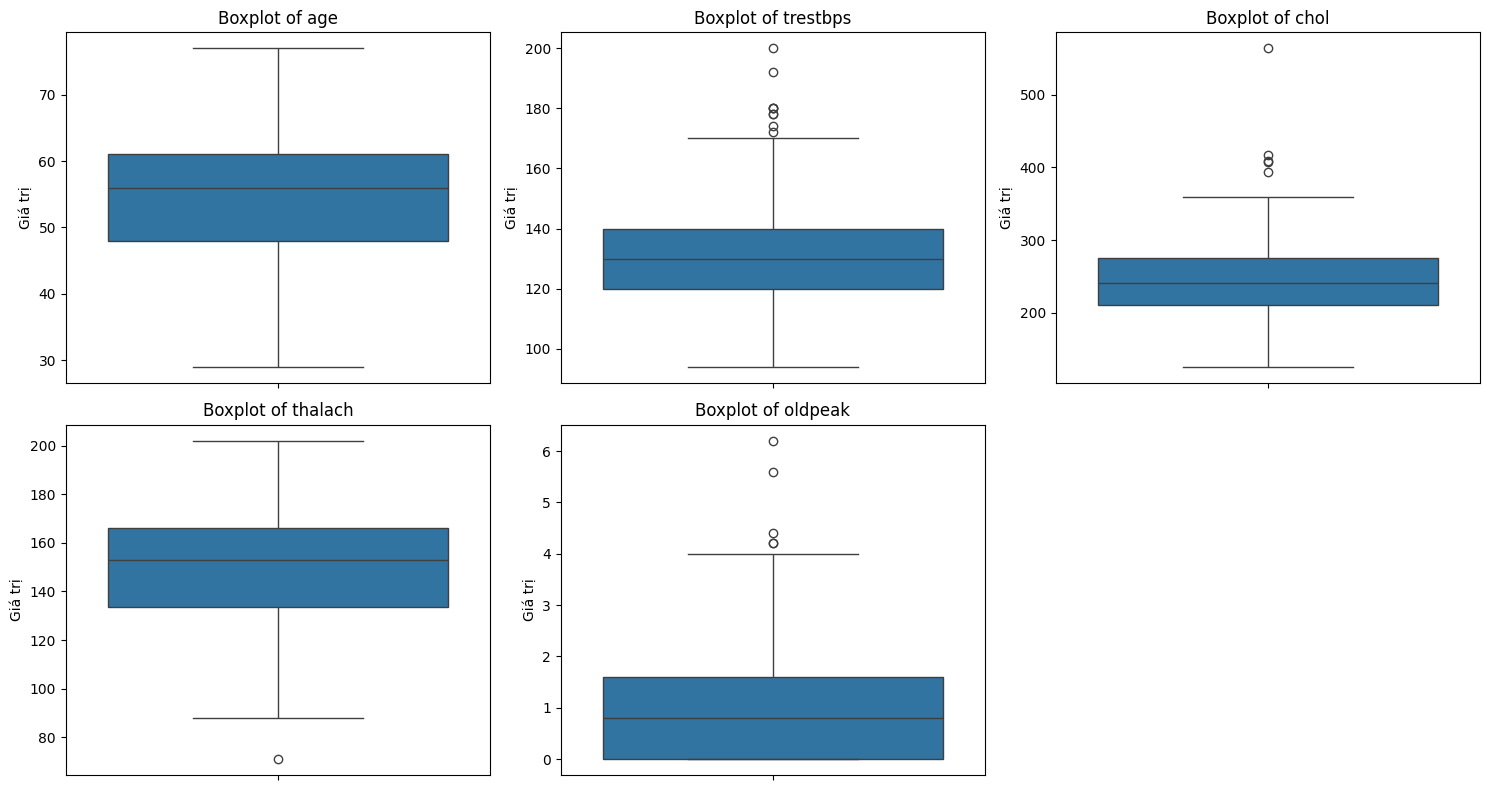

In [ ]:
# Danh sách các biến liên tục cần kiểm tra
continuous_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Vẽ boxplot cho từng biến
plt.figure(figsize=(15, 8))

for i, col in enumerate(continuous_columns, 1):
    plt.subplot(2, 3, i)  # Chia lưới 2 hàng 3 cột
    sns.boxplot(y=df_filled[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel('Giá trị')

plt.tight_layout()
plt.show()

In [ ]:
# Tách biến đầu vào và đầu ra
X = df_filled.drop('target', axis=1)
y = df_filled['target'].apply(lambda x: 1 if int(x) > 0 else 0)

 BẮT ĐẦU PHÂN TÍCH OUTLIERS...
=== THALACH ===
Outliers detected: 1
IQR bounds: 84.8 - 214.8

=== OLDPEAK ===
Outliers detected: 5

=== AGE ===
Outliers detected: 0

=== TRESTBPS ===
Outliers detected: 9

=== CHOL ===
Outliers detected: 5

 THỐNG KÊ TRƯỚC VÀ SAU XỬ LÝ:

--- THALACH ---
Trước: Min=71.0, Max=202.0, Median=153.0
Sau:   Min=84.8, Max=202.0, Median=153.0
Outliers: 1 → 0

--- OLDPEAK ---
Trước: Min=0.0, Max=6.2, Median=0.8
Sau:   Min=0.0, Max=4.0, Median=0.8
Outliers: 5 → 0

--- AGE ---
Trước: Min=29.0, Max=77.0, Median=56.0
Sau:   Min=29.0, Max=77.0, Median=56.0
Outliers: 0 → 0

--- TRESTBPS ---
Trước: Min=94.0, Max=200.0, Median=130.0
Sau:   Min=94.0, Max=170.0, Median=130.0
Outliers: 9 → 0

--- CHOL ---
Trước: Min=126.0, Max=564.0, Median=241.0
Sau:   Min=126.0, Max=371.0, Median=241.0
Outliers: 5 → 0


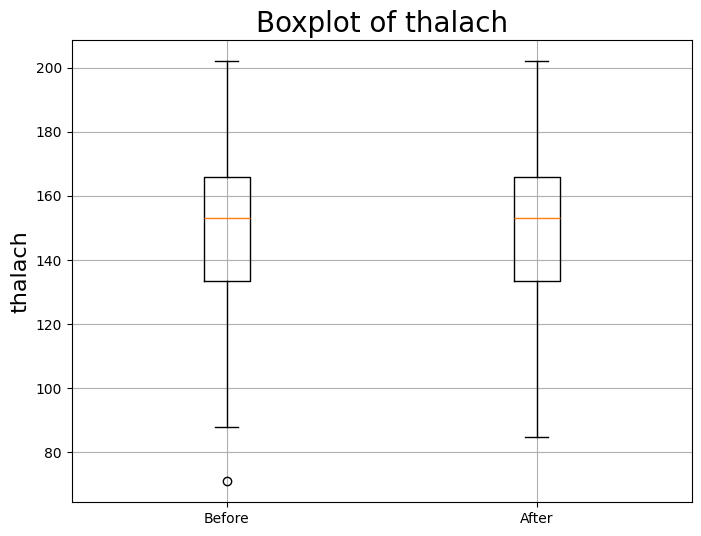

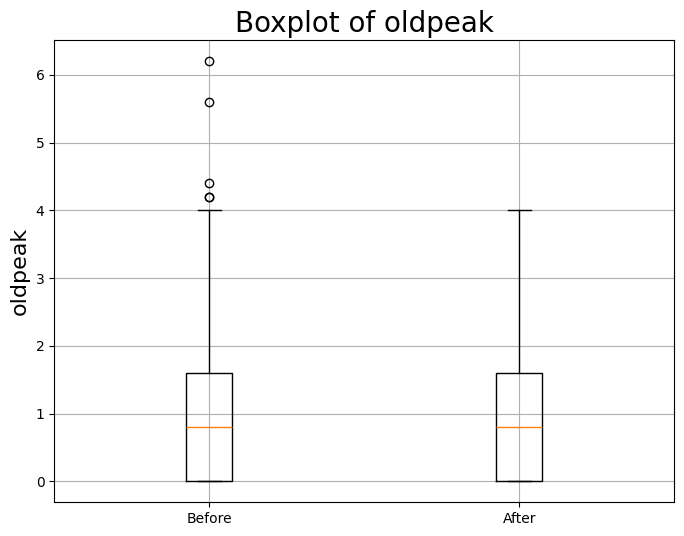

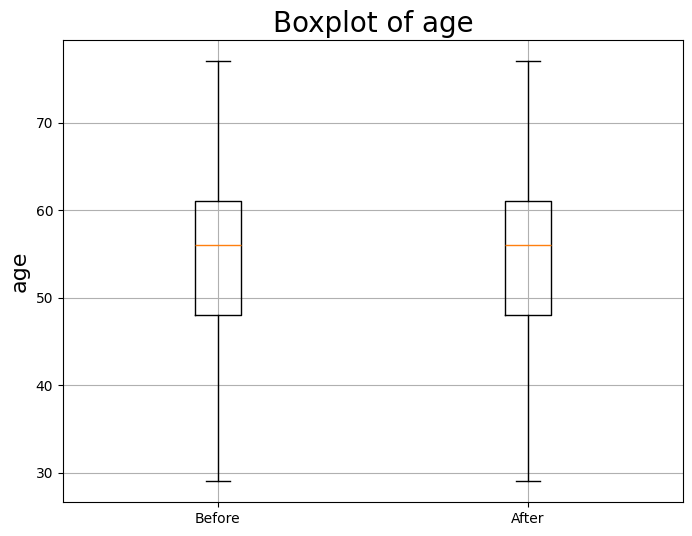

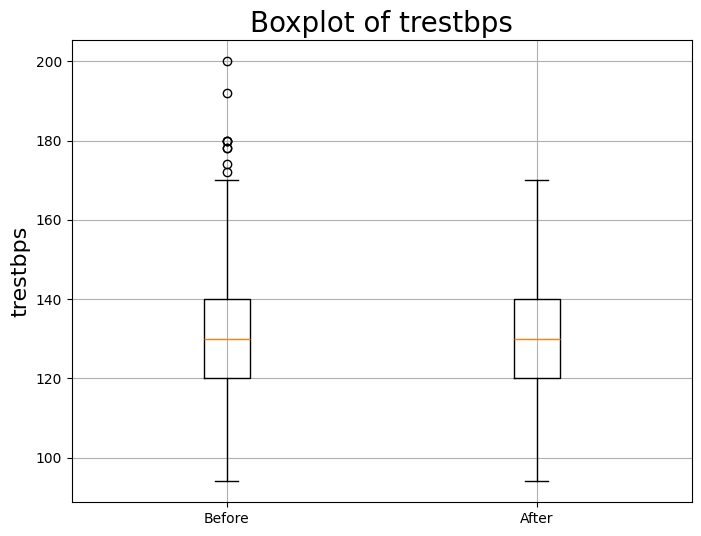

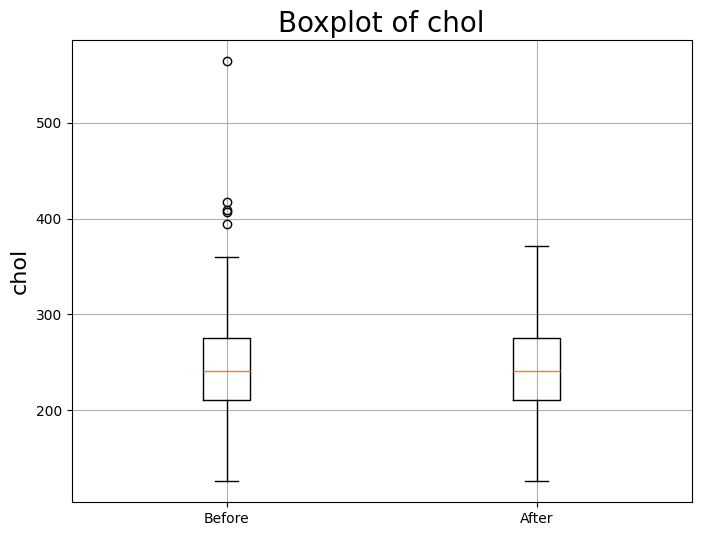


 KIỂM TRA TÍNH CHUẨN (SHAPIRO-WILK TEST):
   shapiro_p  is_normal  skewness
0     0.0001      False   -0.4908
1     0.0000      False    0.9929
2     0.0061      False   -0.2080
3     0.0000      False    0.3814
4     0.0201      False    0.3294

 HOÀN THÀNH! Dữ liệu đã được xử lý.


In [ ]:
# Phương pháp xử lý outliers
class OutlierHandler:

    def __init__(self, data):
        self.data = data.copy()

    def detect_outliers_iqr(self, column):
        """Phát hiện outliers bằng phương pháp IQR"""
        Q1 = self.data[column].quantile(0.25)
        Q3 = self.data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = self.data[(self.data[column] < lower_bound) |
                             (self.data[column] > upper_bound)]
        return outliers, lower_bound, upper_bound

    def detect_outliers_zscore(self, column, threshold=3):
        """Phát hiện outliers bằng Z-score"""
        z_scores = np.abs(stats.zscore(self.data[column]))
        outliers = self.data[z_scores > threshold]
        return outliers

    def cap_outliers_iqr(self, column):
        """Giới hạn outliers (capping) theo IQR"""
        Q1 = self.data[column].quantile(0.25)
        Q3 = self.data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        self.data[column] = np.clip(self.data[column], lower_bound, upper_bound)
        return self.data

    def remove_outliers(self, column, method='iqr'):
        """Loại bỏ outliers"""
        if method == 'iqr':
            _, lower_bound, upper_bound = self.detect_outliers_iqr(column)
            self.data = self.data[(self.data[column] >= lower_bound) &
                                  (self.data[column] <= upper_bound)]
        elif method == 'zscore':
            z_scores = np.abs(stats.zscore(self.data[column]))
            self.data = self.data[z_scores <= 3]
        return self.data

    def transform_data(self, column, method='log'):
        if method == 'log':
            self.data[f'{column}_log'] = np.log1p(self.data[column])  # log1p để tránh log(0)
        elif method == 'sqrt':
            self.data[f'{column}_sqrt'] = np.sqrt(self.data[column])
        return self.data



# Hướng dẫn xử lý cụ thể cho từng biến
def process_heart_data(df):
    """
    Xử lý outliers cho dữ liệu tim mạch
    """
    handler = OutlierHandler(df)

    # 1. THALACH
    print("=== THALACH ===")
    outliers, lower, upper = handler.detect_outliers_iqr('thalach')
    print(f"Outliers detected: {len(outliers)}")
    print(f"IQR bounds: {lower:.1f} - {upper:.1f}")
    handler.cap_outliers_iqr('thalach')

    # 2. OLDPEAK
    print("\n=== OLDPEAK ===")
    outliers, lower, upper = handler.detect_outliers_iqr('oldpeak')
    print(f"Outliers detected: {len(outliers)}")
    handler.cap_outliers_iqr('oldpeak')

    # 3. AGE
    print("\n=== AGE ===")
    outliers, lower, upper = handler.detect_outliers_iqr('age')
    print(f"Outliers detected: {len(outliers)}")
    handler.data['age'] = np.clip(handler.data['age'], 18, 100)

    # 4. TRESTBPS
    print("\n=== TRESTBPS ===")
    outliers, lower, upper = handler.detect_outliers_iqr('trestbps')
    print(f"Outliers detected: {len(outliers)}")
    handler.cap_outliers_iqr('trestbps')

    # 5. CHOL
    print("\n=== CHOL ===")
    outliers, lower, upper = handler.detect_outliers_iqr('chol')
    print(f"Outliers detected: {len(outliers)}")
    handler.data.loc[handler.data['chol'] == 0, 'chol'] = handler.data['chol'].median()
    handler.cap_outliers_iqr('chol')

    return handler.data

def check_normality(df, columns):
    """
    Kiểm tra tính chuẩn của các biến với Shapiro-Wilk Test và tính độ lệch Skewness
    Trả về DataFrame kết quả
    """
    results = []

    for col in columns:
        stat, p_value = shapiro(df[col])
        is_normal = p_value > 0.05  # p > 0.05 thì giả thiết H0 không bị bác bỏ => phân phối chuẩn
        skewness_value = skew(df[col])

        results.append({
            'column': col,
            'shapiro_p': p_value,
            'is_normal': is_normal,
            'skewness': skewness_value
        })

    return pd.DataFrame(results)

def plot_before_after(original_data, processed_data, columns):
    """
    Vẽ từng boxplot riêng biệt để so sánh
    """
    for col in columns:
        plt.figure(figsize=(8, 6))  # Mỗi biểu đồ chiếm nguyên khung hình
        plt.boxplot([original_data[col], processed_data[col]], tick_labels=['Before', 'After'])
        plt.title(f'Boxplot of {col}', fontsize=20)
        plt.ylabel(col, fontsize=16)
        plt.grid(True)
        plt.show()

# CHẠY CODE THỰC TẾ
if 'df' in locals() or 'df' in globals():
    print(" BẮT ĐẦU PHÂN TÍCH OUTLIERS...")
    print("=" * 50)

    # Tạo bản copy để so sánh trước và sau
    original_data = df_filled.copy()

    # Xử lý outliers
    processed_data = process_heart_data(df_filled)

    print("\n THỐNG KÊ TRƯỚC VÀ SAU XỬ LÝ:")
    print("=" * 50)

    columns_to_check = ['thalach', 'oldpeak', 'age', 'trestbps', 'chol']

    for col in columns_to_check:
        if col in original_data.columns:
            print(f"\n--- {col.upper()} ---")
            print(f"Trước: Min={original_data[col].min():.1f}, Max={original_data[col].max():.1f}, Median={original_data[col].median():.1f}")
            print(f"Sau:   Min={processed_data[col].min():.1f}, Max={processed_data[col].max():.1f}, Median={processed_data[col].median():.1f}")

            # Đếm outliers bằng IQR
            Q1_orig = original_data[col].quantile(0.25)
            Q3_orig = original_data[col].quantile(0.75)
            IQR_orig = Q3_orig - Q1_orig
            outliers_orig = ((original_data[col] < Q1_orig - 1.5 * IQR_orig) |
                             (original_data[col] > Q3_orig + 1.5 * IQR_orig)).sum()

            Q1_proc = processed_data[col].quantile(0.25)
            Q3_proc = processed_data[col].quantile(0.75)
            IQR_proc = Q3_proc - Q1_proc
            outliers_proc = ((processed_data[col] < Q1_proc - 1.5 * IQR_proc) |
                             (processed_data[col] > Q3_proc + 1.5 * IQR_proc)).sum()

            print(f"Outliers: {outliers_orig} → {outliers_proc}")

    # Vẽ biểu đồ boxplot so sánh
    plot_before_after(original_data, processed_data, columns_to_check)

    # Kiểm tra tính chuẩn
    print("\n KIỂM TRA TÍNH CHUẨN (SHAPIRO-WILK TEST):")
    print("=" * 50)
    normality_results = check_normality(processed_data, columns_to_check)
    print(normality_results[['shapiro_p', 'is_normal', 'skewness']].round(4))

    print(f"\n HOÀN THÀNH! Dữ liệu đã được xử lý.")

else:
    print(" KHÔNG TÌM THẤY DATAFRAME 'df'")
    print("Vui lòng:")
    print("1. Đổi tên DataFrame của bạn thành 'df', HOẶC")
    print("2. Thay 'df' trong code thành tên DataFrame thực tế của bạn")
    print("\nVí dụ:")
    print("# Nếu DataFrame của bạn tên là 'heart_data':")
    print("# processed_data = process_heart_data(heart_data)")


In [ ]:
def auto_transform_skewed_data(df, columns, skew_threshold=1, keep_original=True):
    """
    Tự động phát hiện và biến đổi các cột có skewness cao.

    Parameters:
    - df: DataFrame đầu vào
    - columns: Danh sách các cột cần kiểm tra
    - skew_threshold: Ngưỡng skewness để quyết định có cần biến đổi
    - keep_original: Giữ cột gốc hay thay thế bằng cột mới

    Returns:
    - DataFrame sau biến đổi
    - Danh sách các cột đã biến đổi
    """
    handler = OutlierHandler(df)
    transformed_columns = []

    for col in columns:
        skew_value = stats.skew(handler.data[col].dropna())
        print(f" {col}: Skewness = {skew_value:.4f}")

        if abs(skew_value) > skew_threshold:
            if (handler.data[col] <= 0).any():
                print(f" {col} có giá trị <= 0, sử dụng √ (sqrt transformation)")
                handler.transform_data(col, method='sqrt')
                new_col = f'{col}_sqrt'
            else:
                print(f" {col} có skewness cao, sử dụng log transformation")
                handler.transform_data(col, method='log')
                new_col = f'{col}_log'

            transformed_columns.append(new_col)

            if not keep_original:
                handler.data.drop(columns=[col], inplace=True)
                handler.data.rename(columns={new_col: col}, inplace=True)

        else:
            print(f" {col} có skewness chấp nhận được, không cần biến đổi.")

    return handler.data, transformed_columns

In [ ]:
columns_to_check = ['thalach', 'oldpeak', 'age', 'trestbps', 'chol']

processed_data, transformed_cols = auto_transform_skewed_data(processed_data, columns_to_check)

print("\n Các cột đã được biến đổi:")
print(transformed_cols)

 thalach: Skewness = -0.4908
 thalach có skewness chấp nhận được, không cần biến đổi.
 oldpeak: Skewness = 0.9929
 oldpeak có skewness chấp nhận được, không cần biến đổi.
 age: Skewness = -0.2080
 age có skewness chấp nhận được, không cần biến đổi.
 trestbps: Skewness = 0.3814
 trestbps có skewness chấp nhận được, không cần biến đổi.
 chol: Skewness = 0.3294
 chol có skewness chấp nhận được, không cần biến đổi.

 Các cột đã được biến đổi:
[]


In [ ]:
processed_data.info()
processed_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.346535,245.584158,0.148515,0.990099,149.652640,0.326733,1.024422,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,16.648749,47.558803,0.356198,0.994971,22.731735,0.469794,1.110127,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,84.750000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,170.000000,371.000000,1.000000,2.000000,202.000000,1.000000,4.000000,3.000000,3.000000,7.000000,4.000000


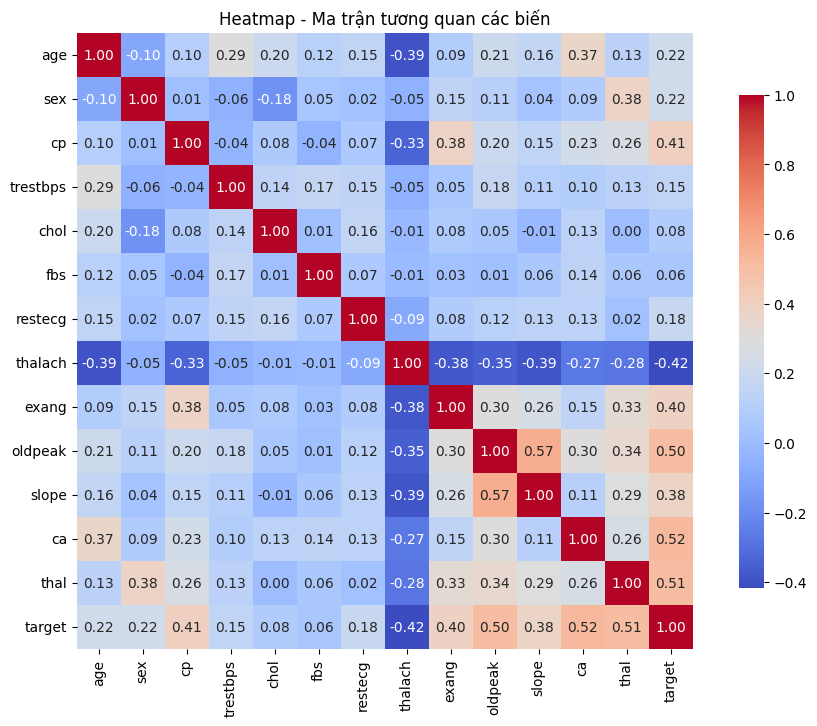

In [ ]:
# Tính ma trận tương quan
corr = processed_data.corr()

# Vẽ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Heatmap - Ma trận tương quan các biến")
plt.show()

In [ ]:
# Tách dữ liệu từ processed_data
X = processed_data.drop(['target'], axis=1)
y = processed_data['target'].apply(lambda x: 1 if int(x) > 0 else 0)

In [ ]:
#Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Chuyển mảng đã scale về DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Xem dữ liệu trước khi scale
print("Dữ liệu X_train TRƯỚC khi scale:")
print(X_train.describe().round(2))

print("\nDữ liệu X_test TRƯỚC khi scale:")
print(X_test.describe().round(2))

# Xem dữ liệu sau khi scale
print("\nDữ liệu X_train SAU khi scale:")
print(X_train_scaled_df.describe().round(2))

print("\nDữ liệu X_test SAU khi scale:")
print(X_test_scaled_df.describe().round(2))

Dữ liệu X_train TRƯỚC khi scale:
          age     sex      cp  trestbps    chol     fbs  restecg  thalach  \
count  242.00  242.00  242.00    242.00  242.00  242.00   242.00   242.00   
mean    54.81    0.66    3.09    131.90  245.03    0.14     0.99   150.16   
std      9.11    0.48    0.99     17.17   46.45    0.34     1.00    22.29   
min     29.00    0.00    1.00     94.00  126.00    0.00     0.00    84.75   
25%     48.00    0.00    2.00    120.00  212.00    0.00     0.00   136.00   
50%     56.00    1.00    3.00    130.00  240.00    0.00     0.50   152.50   
75%     61.75    1.00    4.00    140.00  272.50    0.00     2.00   166.75   
max     77.00    1.00    4.00    170.00  371.00    1.00     2.00   202.00   

        exang  oldpeak   slope      ca    thal  
count  242.00   242.00  242.00  242.00  242.00  
mean     0.34     1.02    1.60    0.64    4.67  
std      0.47     1.13    0.62    0.90    1.93  
min      0.00     0.00    1.00    0.00    3.00  
25%      0.00     0.00    1.

In [ ]:
# Tạo DataFrame để tính VIF
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Tính VIF cho từng biến
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled_df.values, i)
                   for i in range(X_train_scaled_df.shape[1])]
print(vif_data)


    Variable       VIF
0        age  1.558987
1        sex  1.264659
2         cp  1.344120
3   trestbps  1.241650
4       chol  1.104433
5        fbs  1.075085
6    restecg  1.104379
7    thalach  1.637156
8      exang  1.388426
9    oldpeak  1.681947
10     slope  1.587688
11        ca  1.366042
12      thal  1.481040


In [ ]:
#Huấn luyện mô hình
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
#Dự đoán và đánh giá
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8852459016393442

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61


Confusion Matrix:
 [[25  4]
 [ 3 29]]


In [ ]:
#Tính ROC-AUC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
print("ROC-AUC:", roc_auc)

ROC-AUC: 0.927801724137931


In [ ]:
# Lưu model và scaler
joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Đã lưu model và scaler thành công!")

Đã lưu model và scaler thành công!


In [ ]:
!pip install streamlit pyngrok

In [ ]:
import streamlit as st
import pandas as pd
import joblib

# Load model và scaler
model = joblib.load('model.pkl')
scaler = joblib.load('scaler.pkl')

st.set_page_config(page_title="Dự đoán bệnh tim", page_icon="🫀")
st.title("Dự đoán nguy cơ mắc bệnh tim mạch")
st.write("Nhập thông tin bệnh nhân để dự đoán nguy cơ mắc bệnh tim")

# Tạo sidebar để nhập dữ liệu
st.sidebar.header("Thông tin bệnh nhân")

def user_input_features():
    age = st.sidebar.slider("Tuổi", 29, 77, 50)
    sex = st.sidebar.selectbox("Giới tính", [0, 1], format_func=lambda x: "Nữ" if x == 0 else "Nam")
    cp = st.sidebar.selectbox("Loại đau ngực", [0, 1, 2, 3])
    trestbps = st.sidebar.slider("Huyết áp nghỉ (mm Hg)", 94, 170, 120)
    chol = st.sidebar.slider("Cholesterol (mg/dl)", 126, 371, 200)
    fbs = st.sidebar.selectbox("Đường huyết lúc đói > 120 mg/dl", [0, 1], format_func=lambda x: "Có" if x == 1 else "Không")
    restecg = st.sidebar.selectbox("Điện tâm đồ", [0, 1, 2])
    thalach = st.sidebar.slider("Nhịp tim tối đa (bpm)", 85, 202, 150)
    exang = st.sidebar.selectbox("Đau thắt ngực khi vận động", [0, 1], format_func=lambda x: "Có" if x == 1 else "Không")
    oldpeak = st.sidebar.slider("ST depression", 0.0, 4.0, 1.0)
    slope = st.sidebar.selectbox("Độ dốc ST", [0, 1, 2])
    ca = st.sidebar.slider("Số mạch máu chính (0-3)", 0, 3, 0)
    thal = st.sidebar.selectbox("Thalassemia", [0, 1, 2, 3])

    # Tạo DataFrame cho phù hợp input model
    data = {
        'age': age,
        'sex': sex,
        'cp': cp,
        'trestbps': trestbps,
        'chol': chol,
        'fbs': fbs,
        'restecg': restecg,
        'thalach': thalach,
        'exang': exang,
        'oldpeak': oldpeak,
        'slope': slope,
        'ca': ca,
        'thal': thal
    }

    features = pd.DataFrame(data, index=[0])
    return features

# Lấy dữ liệu từ người dùng (sửa từ user_input() thành user_input_features())
input_data = user_input_features()

# Hiển thị dữ liệu
st.subheader("Thông tin đã nhập:")

# Tạo dictionary để mapping giá trị với nhãn hiển thị
def format_display_value(column, value):
    if column == 'sex':
        return "Nữ" if value == 0 else "Nam"
    elif column == 'fbs':
        return "Có" if value == 1 else "Không"
    elif column == 'exang':
        return "Có" if value == 1 else "Không"
    elif column == 'cp':
        cp_labels = {0: "Đau ngực điển hình", 1: "Đau ngực không điển hình",
                     2: "Đau không do tim", 3: "Không có triệu chứng"}
        return cp_labels.get(value, f"Loại {value}")
    elif column == 'restecg':
        ecg_labels = {0: "Bình thường", 1: "Bất thường ST-T", 2: "Phì đại thất trái"}
        return ecg_labels.get(value, f"Loại {value}")
    elif column == 'slope':
        slope_labels = {0: "Dốc lên", 1: "Phẳng", 2: "Dốc xuống"}
        return slope_labels.get(value, f"Loại {value}")
    elif column == 'thal':
        thal_labels = {0: "Bình thường", 1: "Khuyết tật cố định",
                       2: "Khuyết tật có thể phục hồi", 3: "Không xác định"}
        return thal_labels.get(value, f"Loại {value}")
    else:
        return value

# Hiển thị thông tin với nhãn tiếng Việt
labels = {
    'age': "Tuổi",
    'sex': "Giới tính",
    'cp': "Loại đau ngực",
    'trestbps': "Huyết áp nghỉ (mmHg)",
    'chol': "Cholesterol (mg/dl)",
    'fbs': "Đường huyết lúc đói > 120 mg/dl",
    'restecg': "Điện tâm đồ",
    'thalach': "Nhịp tim tối đa (bpm)",
    'exang': "Đau thắt ngực khi vận động",
    'oldpeak': "ST depression",
    'slope': "Độ dốc ST",
    'ca': "Số mạch máu chính",
    'thal': "Thalassemia"
}

for column in input_data.columns:
    value = input_data[column].iloc[0]
    display_value = format_display_value(column, value)
    st.write(f"- {labels[column]}: {display_value}")

# Nút dự đoán
if st.button("Dự đoán"):
    try:
        # Chuẩn hóa dữ liệu
        input_scaled = scaler.transform(input_data)

        # Dự đoán xác suất
        prob = model.predict_proba(input_scaled)[0, 1]

        # Phân loại nguy cơ
        risk = "Nguy cơ cao" if prob >= 0.5 else "Nguy cơ thấp"

        # Hiển thị kết quả
        st.subheader("Kết quả dự đoán:")

        # Thay đổi màu sắc dựa trên mức độ nguy cơ
        if prob >= 0.7:
            st.error(f"⚠️ Xác suất mắc bệnh tim: {prob*100:.1f}% - {risk}")
        elif prob >= 0.5:
            st.warning(f"⚠️ Xác suất mắc bệnh tim: {prob*100:.1f}% - {risk}")
        else:
            st.success(f"✅ Xác suất mắc bệnh tim: {prob*100:.1f}% - {risk}")

        # Hiển thị thanh tiến trình
        st.progress(prob)

        # Khuyến nghị
        st.subheader("Khuyến nghị:")
        if prob >= 0.7:
            st.write("🔴 **Nguy cơ rất cao**: Nên đi khám tim mạch ngay lập tức!")
        elif prob >= 0.5:
            st.write("🟡 **Nguy cơ cao**: Nên tham khảo ý kiến bác sĩ chuyên khoa tim mạch.")
        else:
            st.write("🟢 **Nguy cơ thấp**: Duy trì lối sống lành mạnh và khám sức khỏe định kỳ.")

    except Exception as e:
        st.error(f"Lỗi khi dự đoán: {str(e)}")
        st.write("Vui lòng kiểm tra lại file model.pkl và scaler.pkl")

2025-06-20 10:28:00.746 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 10:28:00.748 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 10:28:00.749 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 10:28:00.755 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 10:28:00.756 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 10:28:00.757 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 10:28:00.758 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 10:28:00.760 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
!pip show streamlit
!pip show transformers
!pip show pyngrok

In [ ]:
!rm -rf /root/.ngrok2/ngrok.yml

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2025-06-20 10:28:21--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 35.71.179.82, 75.2.60.68, 99.83.220.108, ...
Connecting to bin.equinox.io (bin.equinox.io)|35.71.179.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.28M  19.0MB/s    in 0.7s    

2025-06-20 10:28:22 (19.0 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13921656/13921656]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
!ngrok config add-authtoken 2xUIVFYU2YvFW3y6YFfgXHSFYx1_3JUNxFUJqN1cZazyR8XTn

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!./ngrok http 8501

Usage of ngrok requires a verified account and authtoken.

Sign up for an account: https://dashboard.ngrok.com/signup
Install your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken

ERR_NGROK_4018



In [ ]:
!streamlit run app.py &>/dev/null&

In [ ]:
!ls

app.py	model.pkl  ngrok  ngrok-stable-linux-amd64.zip	sample_data  scaler.pkl


In [ ]:
pip install streamlit transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 33.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.69.129.68:8501

  Stopping...
  Stopping...


In [ ]:
!streamlit run app.py --server.port 8501 --server.headless true &>/dev/null&

In [ ]:
!lsof -i:8501

COMMAND    PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
streamlit 3737 root    6u  IPv4 106512      0t0  TCP *:8501 (LISTEN)
streamlit 3737 root    7u  IPv6 106513      0t0  TCP *:8501 (LISTEN)


In [ ]:
!ps aux | grep streamlit

root        3737 23.3  0.4  69720 58640 ?        S    10:31   0:00 /usr/bin/python3 /usr/local/bin/streamlit run app.py --server.port 8501 --server.headless true
root        3750  0.0  0.0   7376  3460 ?        S    10:31   0:00 /bin/bash -c ps aux | grep streamlit
root        3752  0.0  0.0   6484  2280 ?        S    10:31   0:00 grep streamlit


In [ ]:
from pyngrok import ngrok

# Mở cổng ngrok để tạo URL công khai
public_url = ngrok.connect(8501)  # 8501 là cổng mặc định của Streamlit
print("Mở ứng dụng tại:", public_url)

Mở ứng dụng tại: NgrokTunnel: "https://b104-34-69-129-68.ngrok-free.app" -> "http://localhost:8501"
